In [105]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [150]:
with open('jeju_all.bin', 'rb') as f:
    jeju_total = pickle.load(f)

In [151]:
jeju_total.tail(3)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,...,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong,Category,dong_cat,Time_cut
278934,278935,278935,202008,제주특별자치도,서귀포시,영세,예체능학원,x,110000,0,...,0,921003.9820,1.476178e+06,126.65174159048293,33.27407883370635,126.65174159048293_33.27407883370635,남원읍,교육/육아,남원읍,무승인거래
279537,279538,279538,202008,제주특별자치도,서귀포시,영세,기타가구,x,50000,0,...,0,937500.1674,1.486053e+06,126.82818252032293,33.36422597166204,126.82818252032293_33.36422597166204,성산읍,생활/기타,성산읍,무승인거래
279784,279785,279785,202008,제주특별자치도,제주시,영세,기타숙박업,x,17470,0,...,0,941114.0531,1.503713e+06,126.86586853032782,33.52371304945294,126.86586853032782_33.52371304945294,구좌읍,여행/숙박,구좌읍,무승인거래


In [5]:
# 그래프를 좀 더 선명하게
%config InlineBackend.figure_format = 'retina'

In [92]:
import matplotlib as mpl
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
from matplotlib import rc

In [93]:
font_list = fm.findSystemFonts()

In [224]:
plt.rcParams["font.family"] = "esamanru OTF"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['axes.unicode_minus'] = False

## 전체 데이터 가지고 시각화 해보기

In [95]:
pal_pastel = sns.color_palette('pastel')

In [153]:
drop_cols = ['OBJECTID', 'Field1', 'POINT_X', "POINT_Y", 'lon_lat', 'dong']
jeju = jeju_total.copy().drop(drop_cols, axis=1)

In [216]:
jeju.tail(3)

,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,lon,lat,Category,dong_cat,Time_cut
278934,202008,제주특별자치도,서귀포시,영세,예체능학원,x,110000,0,1,0,126.65174159048293,33.27407883370635,교육/육아,남원읍,무승인거래
279537,202008,제주특별자치도,서귀포시,영세,기타가구,x,50000,0,1,0,126.82818252032293,33.36422597166204,생활/기타,성산읍,무승인거래
279784,202008,제주특별자치도,제주시,영세,기타숙박업,x,17470,0,2,0,126.86586853032782,33.52371304945294,여행/숙박,구좌읍,무승인거래


### 전체 이용금액 시각화

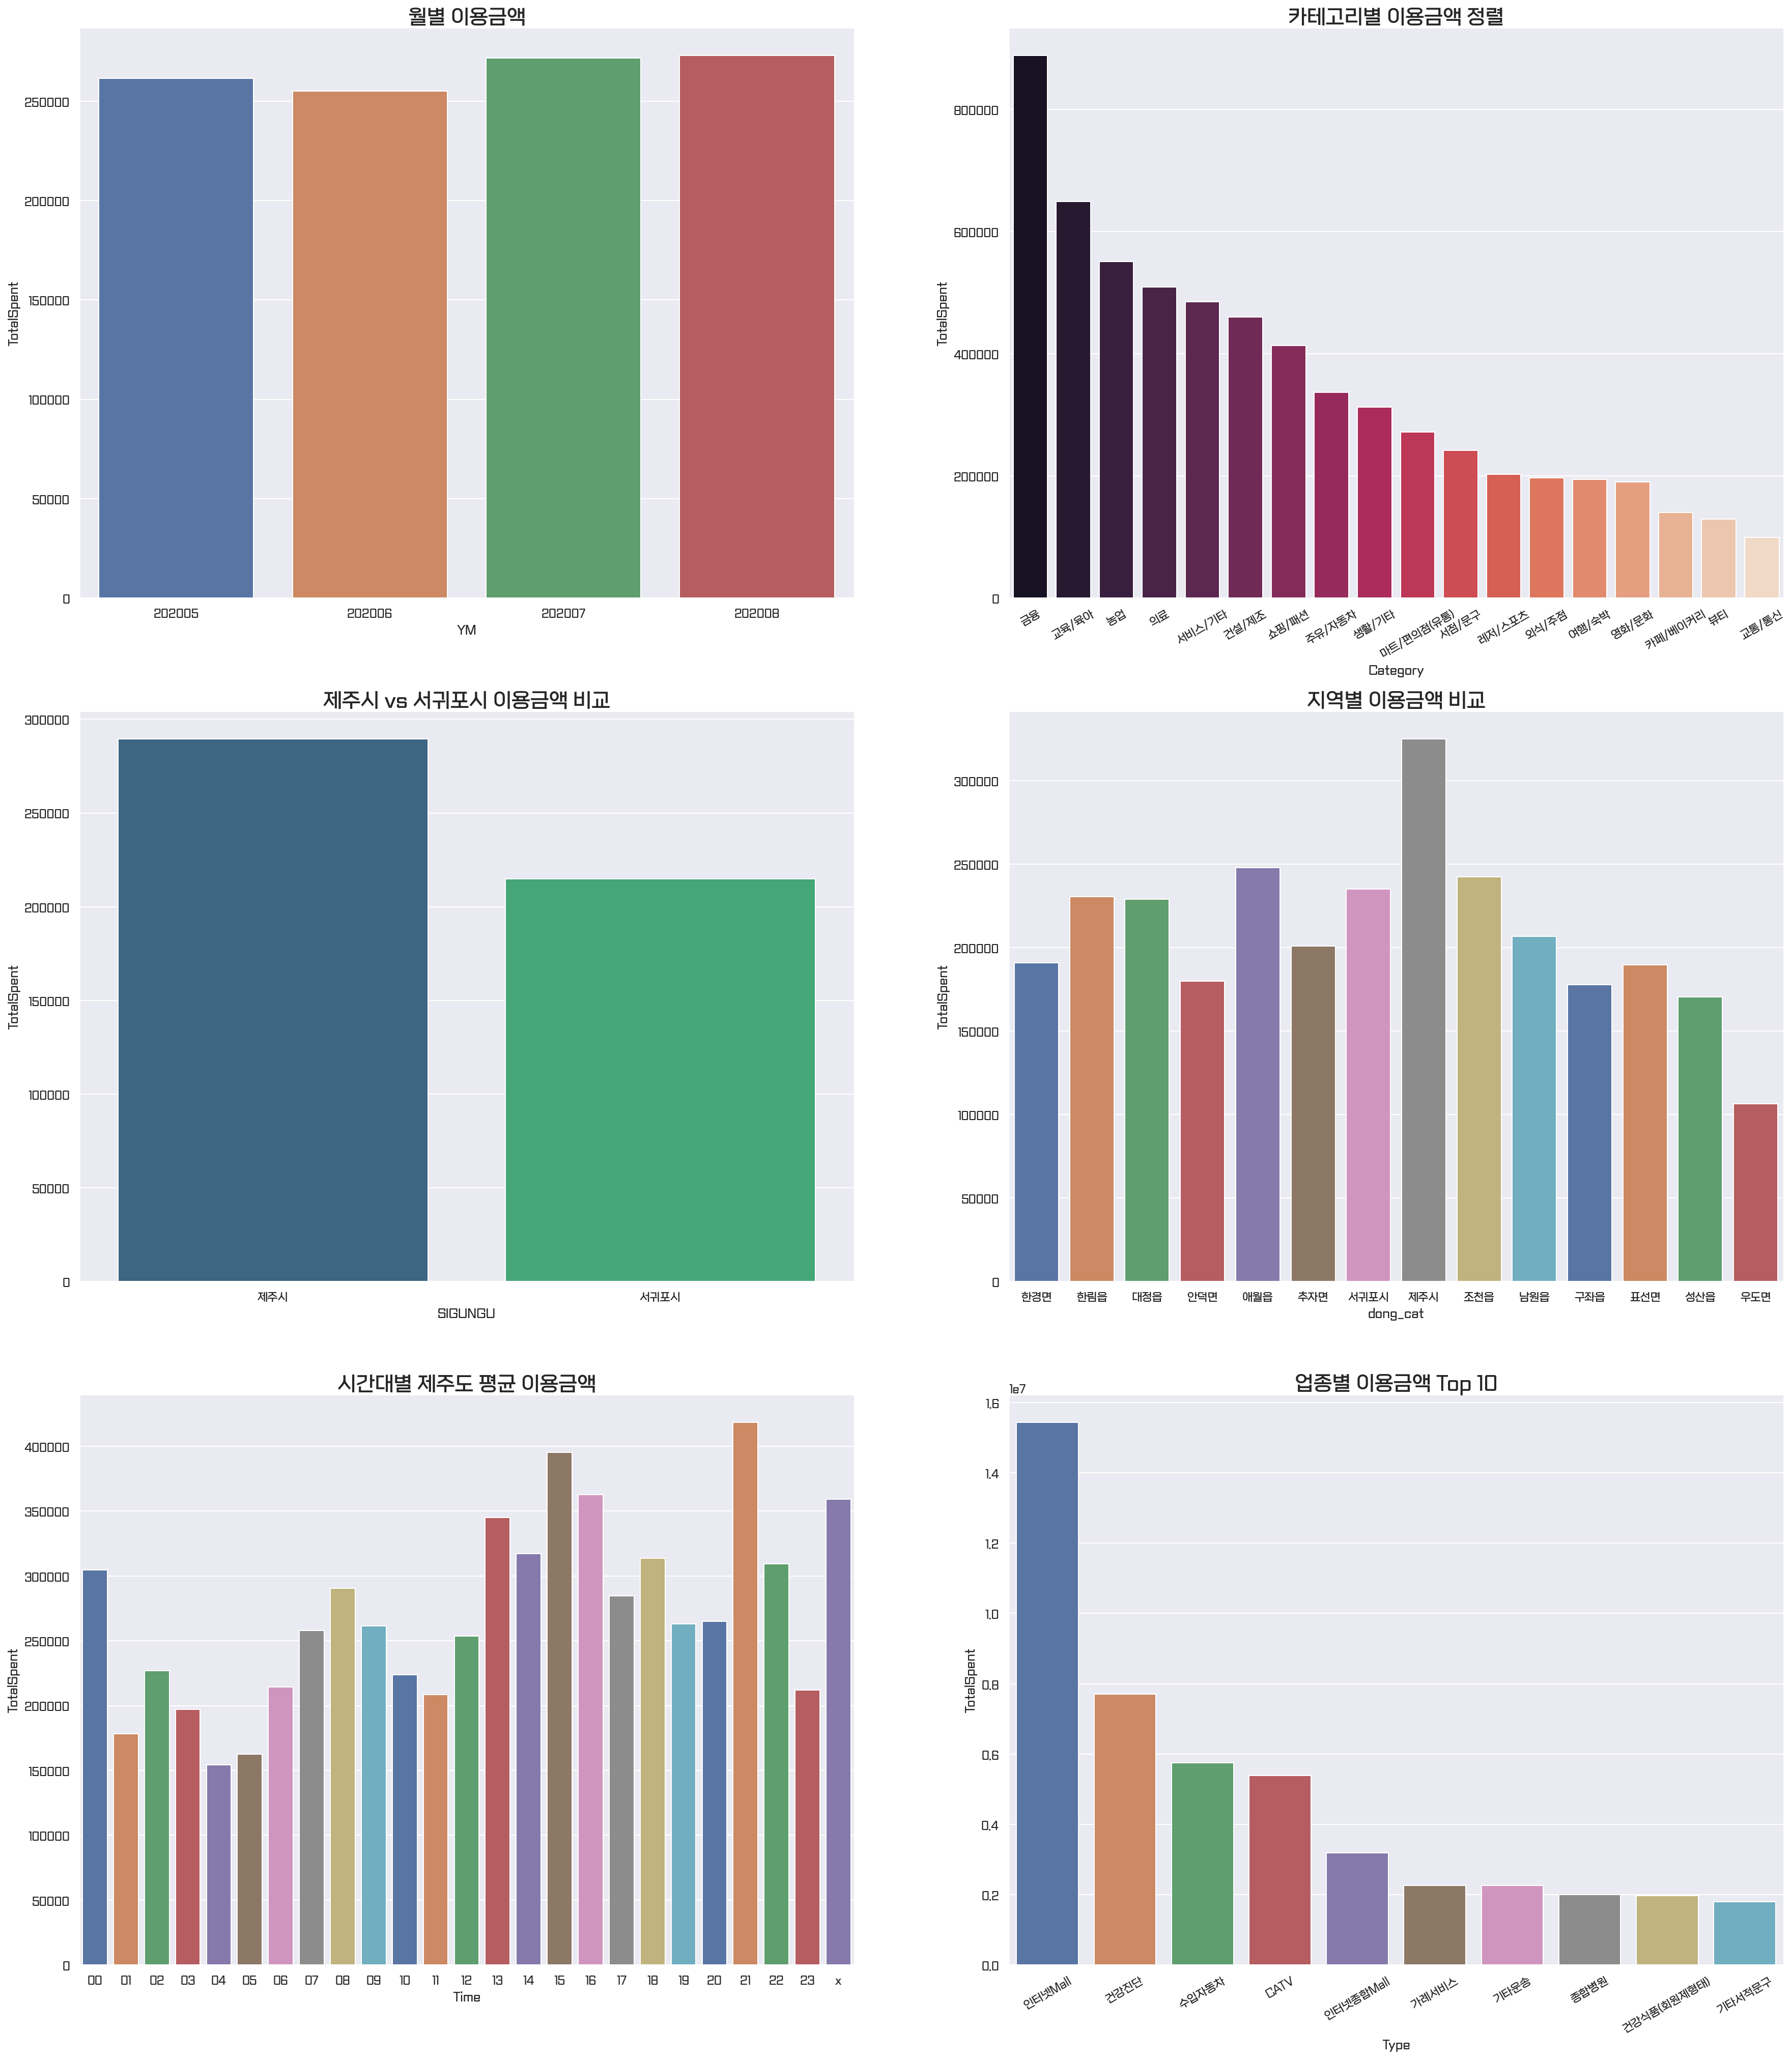

In [235]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(30, 35)

cat_mean = jeju.groupby(['Category'])['TotalSpent'].mean().to_frame().sort_values(by='TotalSpent', ascending=False)
type_nlargest = jeju.groupby(['Type'])['TotalSpent'].mean().to_frame().nlargest(10, 'TotalSpent')

sns.barplot(data=jeju, x='YM', y='TotalSpent', palette="deep", ax=ax1, ci=None)
sns.barplot(data=cat_mean, x=cat_mean.index, y='TotalSpent', ax=ax2, palette='rocket')
sns.barplot(data=jeju, x='SIGUNGU', y='TotalSpent', palette='viridis', ax=ax3, ci=None)
sns.barplot(data=jeju, x='dong_cat', y='TotalSpent', palette='deep', ax=ax4, ci=None)
sns.barplot(data=jeju, x='Time', y='TotalSpent', palette='deep', ax=ax5, ci=None)
sns.barplot(data=type_nlargest, x=type_nlargest.index, y='TotalSpent', ax=ax6)
sns.despine(bottom=True) # 축을 그리지 않는다.

title_size = 20
label_size = 12
ticks_size=16

ax1.set_title('월별 이용금액')
ax2.set_title('카테고리별 이용금액 정렬')
ax3.set_title('제주시 vs 서귀포시 이용금액 비교')
ax4.set_title('지역별 이용금액 비교')
ax5.set_title('시간대별 제주도 평균 이용금액')
ax6.set_title('업종별 이용금액 Top 10')

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=30)

params = {
    'axes.labelsize': label_size,
    'axes.titlesize': title_size
}
plt.rcParams.update(params)

### 업종별로 구분

<AxesSubplot:xlabel='Type', ylabel='TotalSpent'>

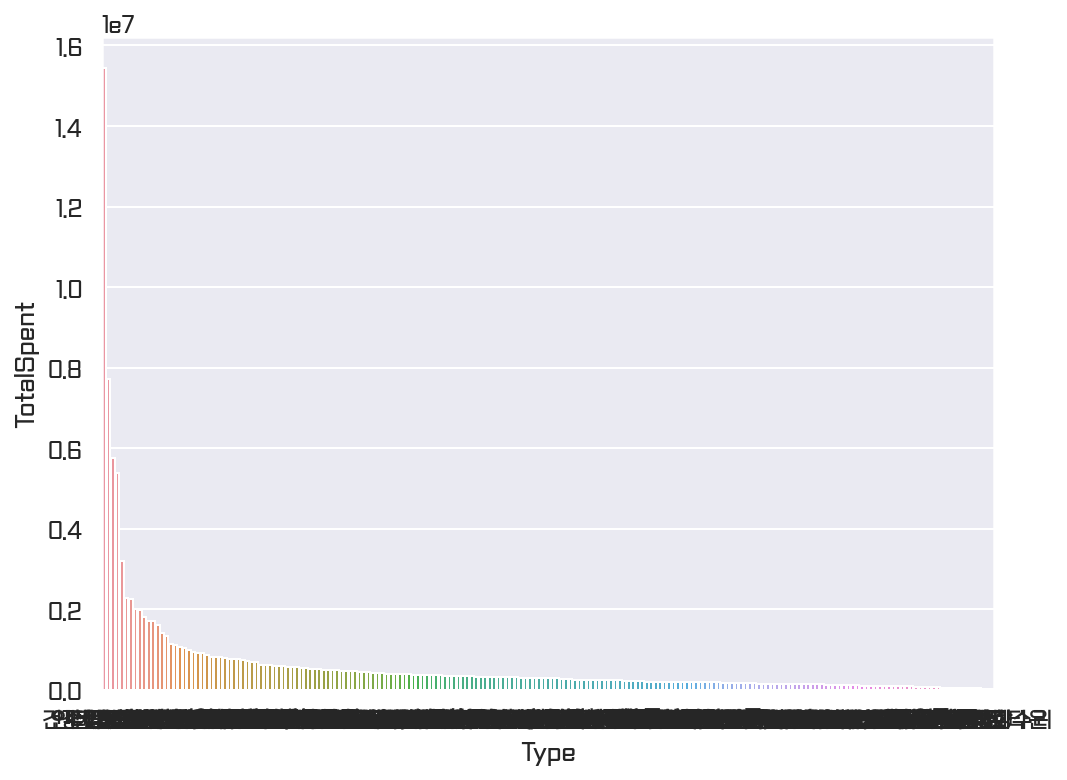

In [114]:
type_ts = jeju.groupby(['Type'])['TotalSpent'].mean().to_frame().sort_values(by='TotalSpent', ascending=False)
sns.barplot(data=type_ts, x=type_ts.index, y="TotalSpent")

In [143]:
type_ts_nlargest = type_ts.nlargest(10, 'TotalSpent')
type_ts_nlargest

,TotalSpent
Type,
인터넷Mall,1.543186e+07
건강진단,7.704805e+06
수입자동차,5.750000e+06
CATV,5.389020e+06
인터넷종합Mall,3.192892e+06
가례서비스,2.266419e+06
기타운송,2.256288e+06
종합병원,1.994772e+06
건강식품(회원제형태),1.970250e+06


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '인터넷Mall'),
  Text(1, 0, '건강진단'),
  Text(2, 0, '수입자동차'),
  Text(3, 0, 'CATV'),
  Text(4, 0, '인터넷종합Mall'),
  Text(5, 0, '가례서비스'),
  Text(6, 0, '기타운송'),
  Text(7, 0, '종합병원'),
  Text(8, 0, '건강식품(회원제형태)'),
  Text(9, 0, '기타서적문구')])

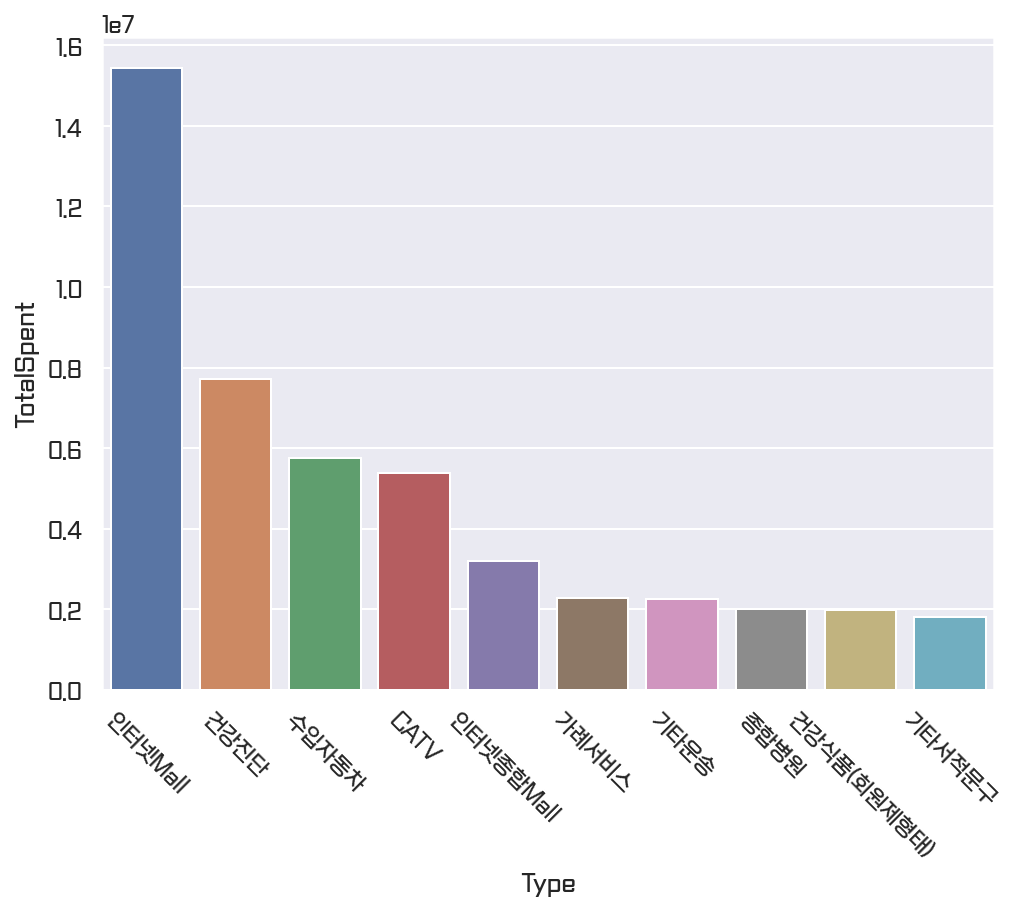

In [144]:
sns.barplot(data=type_ts_nlargest, x=type_ts_nlargest.index, y="TotalSpent")
plt.xticks(rotation=315)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CATV'),
  Text(1, 0, '건강진단'),
  Text(2, 0, '인터넷Mall'),
  Text(3, 0, '인터넷종합Mall'),
  Text(4, 0, '볼링장'),
  Text(5, 0, '공공요금'),
  Text(6, 0, '대형할인점'),
  Text(7, 0, '농협하나로클럽'),
  Text(8, 0, '편의점'),
  Text(9, 0, '종합병원')])

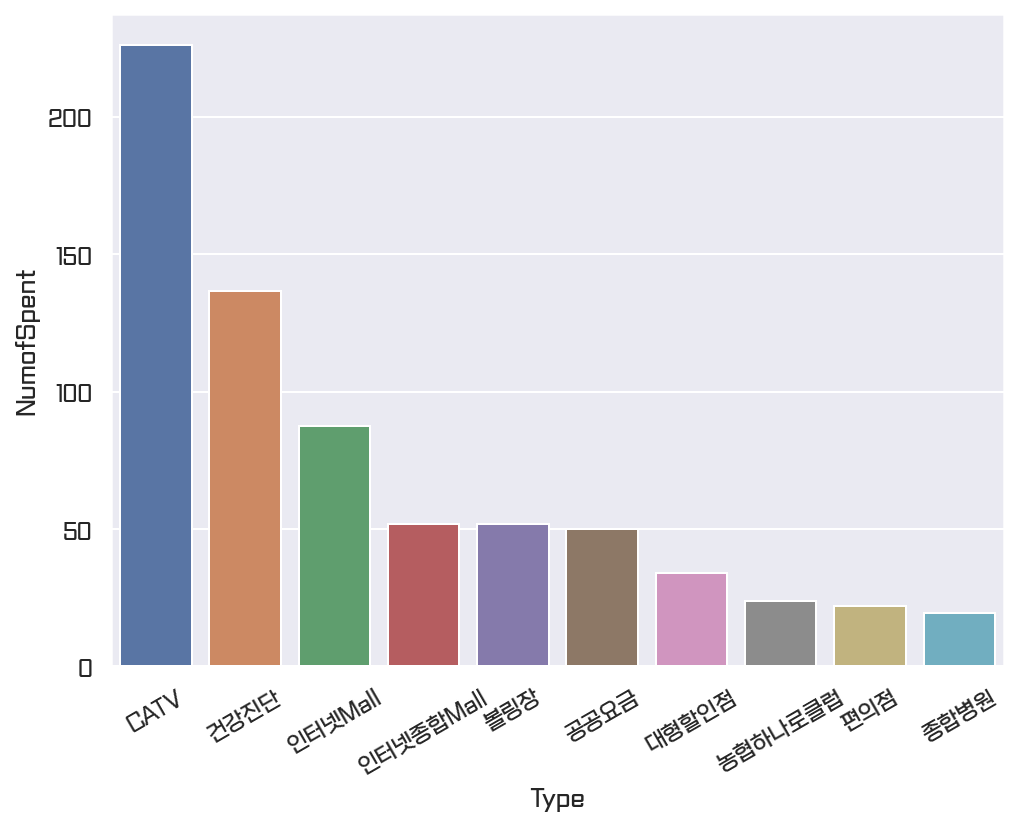

In [128]:
type_cnt = jeju.groupby(["Type"])['NumofSpent'].mean().to_frame().sort_values(by='NumofSpent')
type_cnt_nlargest = type_cnt.nlargest(10, 'NumofSpent')
sns.barplot(data=type_cnt_nlargest, x=type_cnt_nlargest.index, y='NumofSpent')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '건강진단'),
  Text(1, 0, '철제가구'),
  Text(2, 0, '대형할인점'),
  Text(3, 0, '농협하나로클럽'),
  Text(4, 0, '전문서적'),
  Text(5, 0, '과학기자재'),
  Text(6, 0, '종합병원'),
  Text(7, 0, '볼링장'),
  Text(8, 0, '기능학원'),
  Text(9, 0, '유류판매')])

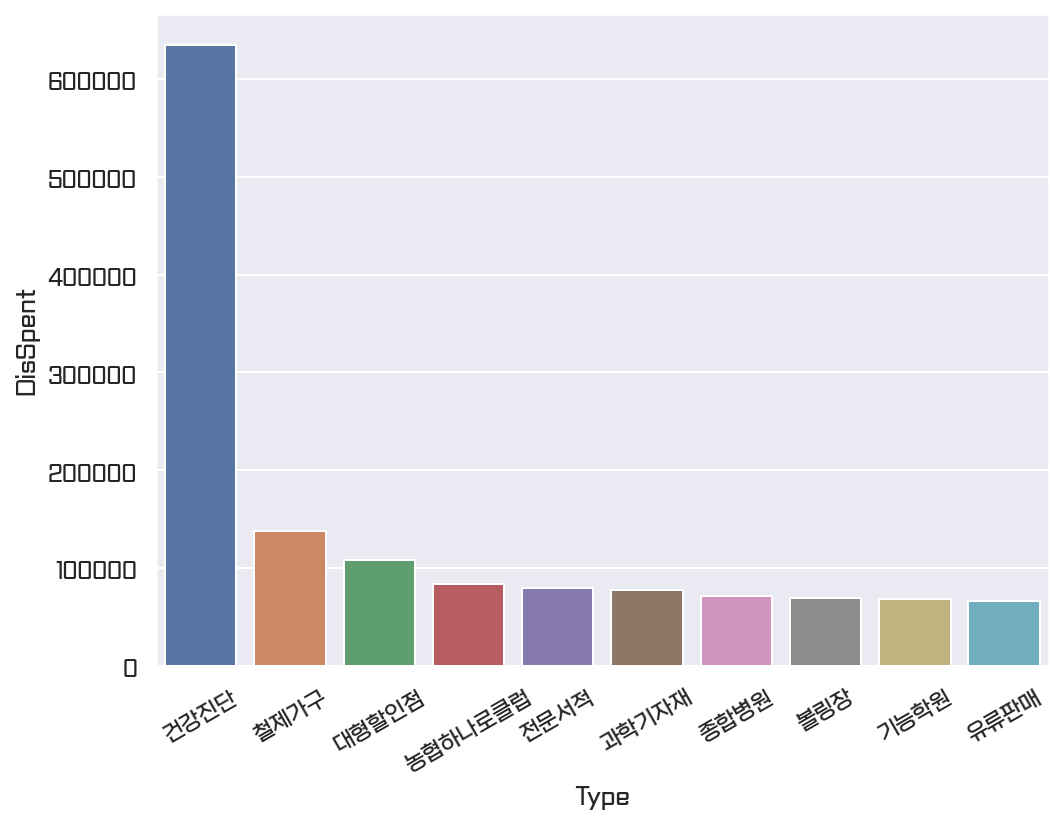

In [158]:
type_disspent = jeju.groupby(['Type'])['DisSpent'].mean().to_frame()
type_disspent_nlargest = type_disspent.nlargest(10, 'DisSpent')
sns.barplot(data=type_disspent_nlargest, x=type_disspent_nlargest.index, y='DisSpent')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '건강진단'),
  Text(1, 0, '대형할인점'),
  Text(2, 0, '볼링장'),
  Text(3, 0, '농협하나로클럽'),
  Text(4, 0, '농축협직영매장'),
  Text(5, 0, '구내매점'),
  Text(6, 0, '연쇄점'),
  Text(7, 0, '종합병원'),
  Text(8, 0, '약국'),
  Text(9, 0, '슈퍼마켓')])

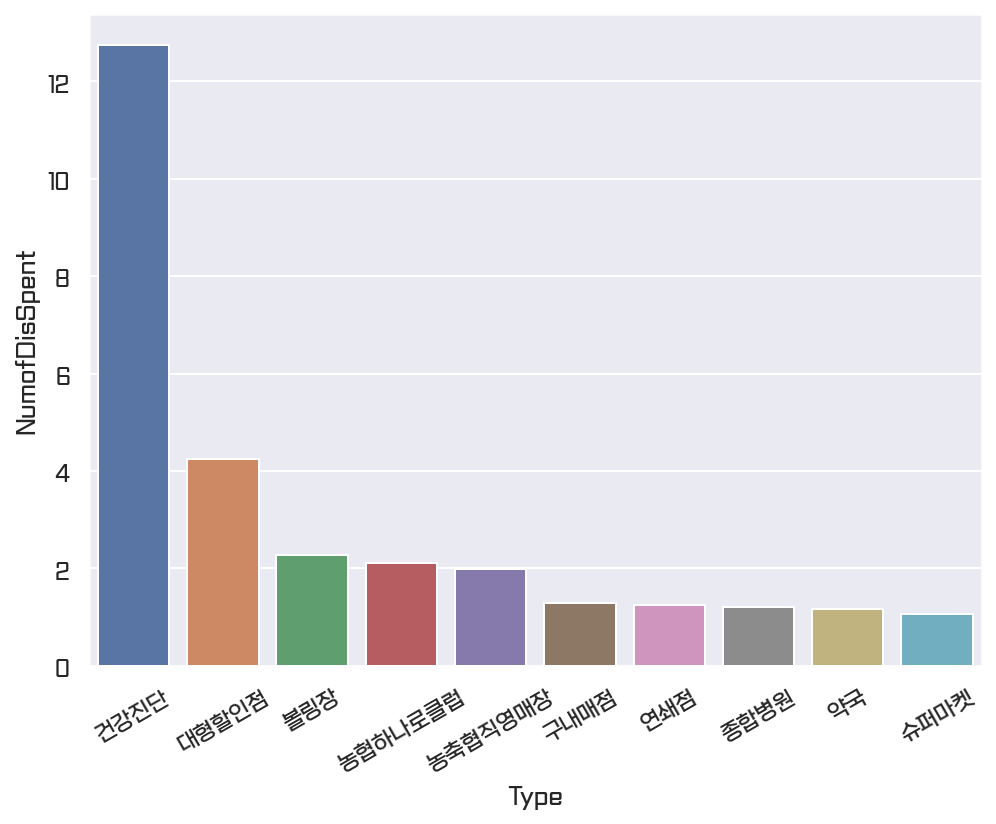

In [129]:
type_discnt = jeju.groupby(['Type'])['NumofDisSpent'].mean().to_frame().sort_values(by='NumofDisSpent')
type_discnt_nlargest = type_discnt.nlargest(10, 'NumofDisSpent')
sns.barplot(data=type_discnt_nlargest, x=type_discnt_nlargest.index, y='NumofDisSpent')
plt.xticks(rotation=30)

### 업종별 재난지원금 사용 비율

In [136]:
df_type_spent = pd.concat([type_cnt, type_discnt], axis=1)
df_type_spent

,NumofSpent,NumofDisSpent
종합레져타운,1.000000,0.000000
기타광학품,1.000000,0.000000
카메라,1.000000,0.333333
양품점,1.000000,0.000000
컴퓨터학원,1.000000,0.000000
...,...,...
볼링장,51.636364,2.272727
인터넷종합Mall,51.750000,0.000000
인터넷Mall,87.642857,0.000000
건강진단,136.500000,12.750000


In [139]:
df_type_spent['ratio'] = df_type_spent['NumofDisSpent'] / df_type_spent['NumofSpent']
df_type_spent

,NumofSpent,NumofDisSpent,ratio
종합레져타운,1.000000,0.000000,0.000000
기타광학품,1.000000,0.000000,0.000000
카메라,1.000000,0.333333,0.333333
양품점,1.000000,0.000000,0.000000
컴퓨터학원,1.000000,0.000000,0.000000
...,...,...,...
볼링장,51.636364,2.272727,0.044014
인터넷종합Mall,51.750000,0.000000,0.000000
인터넷Mall,87.642857,0.000000,0.000000
건강진단,136.500000,12.750000,0.093407


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '과학기자재'),
  Text(1, 0, '제약회사'),
  Text(2, 0, '카메라'),
  Text(3, 0, '정보서비스'),
  Text(4, 0, '철제가구'),
  Text(5, 0, '전문서적'),
  Text(6, 0, '기타사무용'),
  Text(7, 0, '악기점'),
  Text(8, 0, '수족관'),
  Text(9, 0, '견인서비스')])

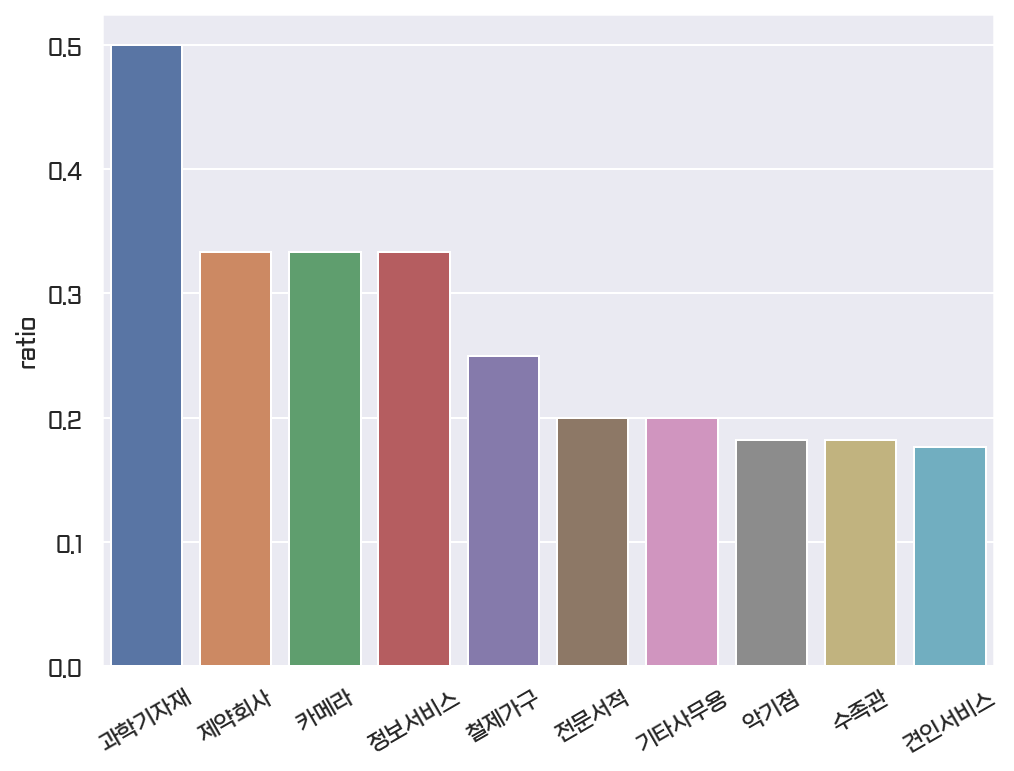

In [141]:
type_spent_ratio_n = df_type_spent.nlargest(10, 'ratio')
sns.barplot(data=type_spent_ratio_n, x=type_spent_ratio_n.index, y='ratio')
plt.xticks(rotation=30)

## 월별, 업종별

In [166]:
ym_type = jeju.groupby(['YM', 'Type'], as_index=False).mean()

In [167]:
ym_type

,YM,Type,TotalSpent,DisSpent,NumofSpent,NumofDisSpent
0,202005,1급호텔,1.500000e+03,0.000000,1.000000,0.000000
1,202005,2급호텔,7.055556e+04,5555.555556,1.333333,0.111111
2,202005,CATV,1.355700e+05,0.000000,4.000000,0.000000
3,202005,LPG,1.919708e+05,48525.125000,3.343750,0.976562
4,202005,가례서비스,1.934333e+06,0.000000,1.000000,0.000000
...,...,...,...,...,...,...
760,202008,화랑,4.600000e+05,0.000000,1.500000,0.000000
761,202008,화물운송,6.613915e+05,0.000000,2.170732,0.000000
762,202008,화방표구점,1.247500e+06,0.000000,2.000000,0.000000
763,202008,화원,1.511704e+05,0.000000,1.395062,0.000000


In [170]:
ym_type_5 = ym_type[ym_type['YM'] == 202005]
ym_type_6 = ym_type[ym_type['YM'] == 202006]
ym_type_7 = ym_type[ym_type['YM'] == 202007]
ym_type_8 = ym_type[ym_type['YM'] == 202008]

### 월별, 업종별 이용 건수를 구해보자

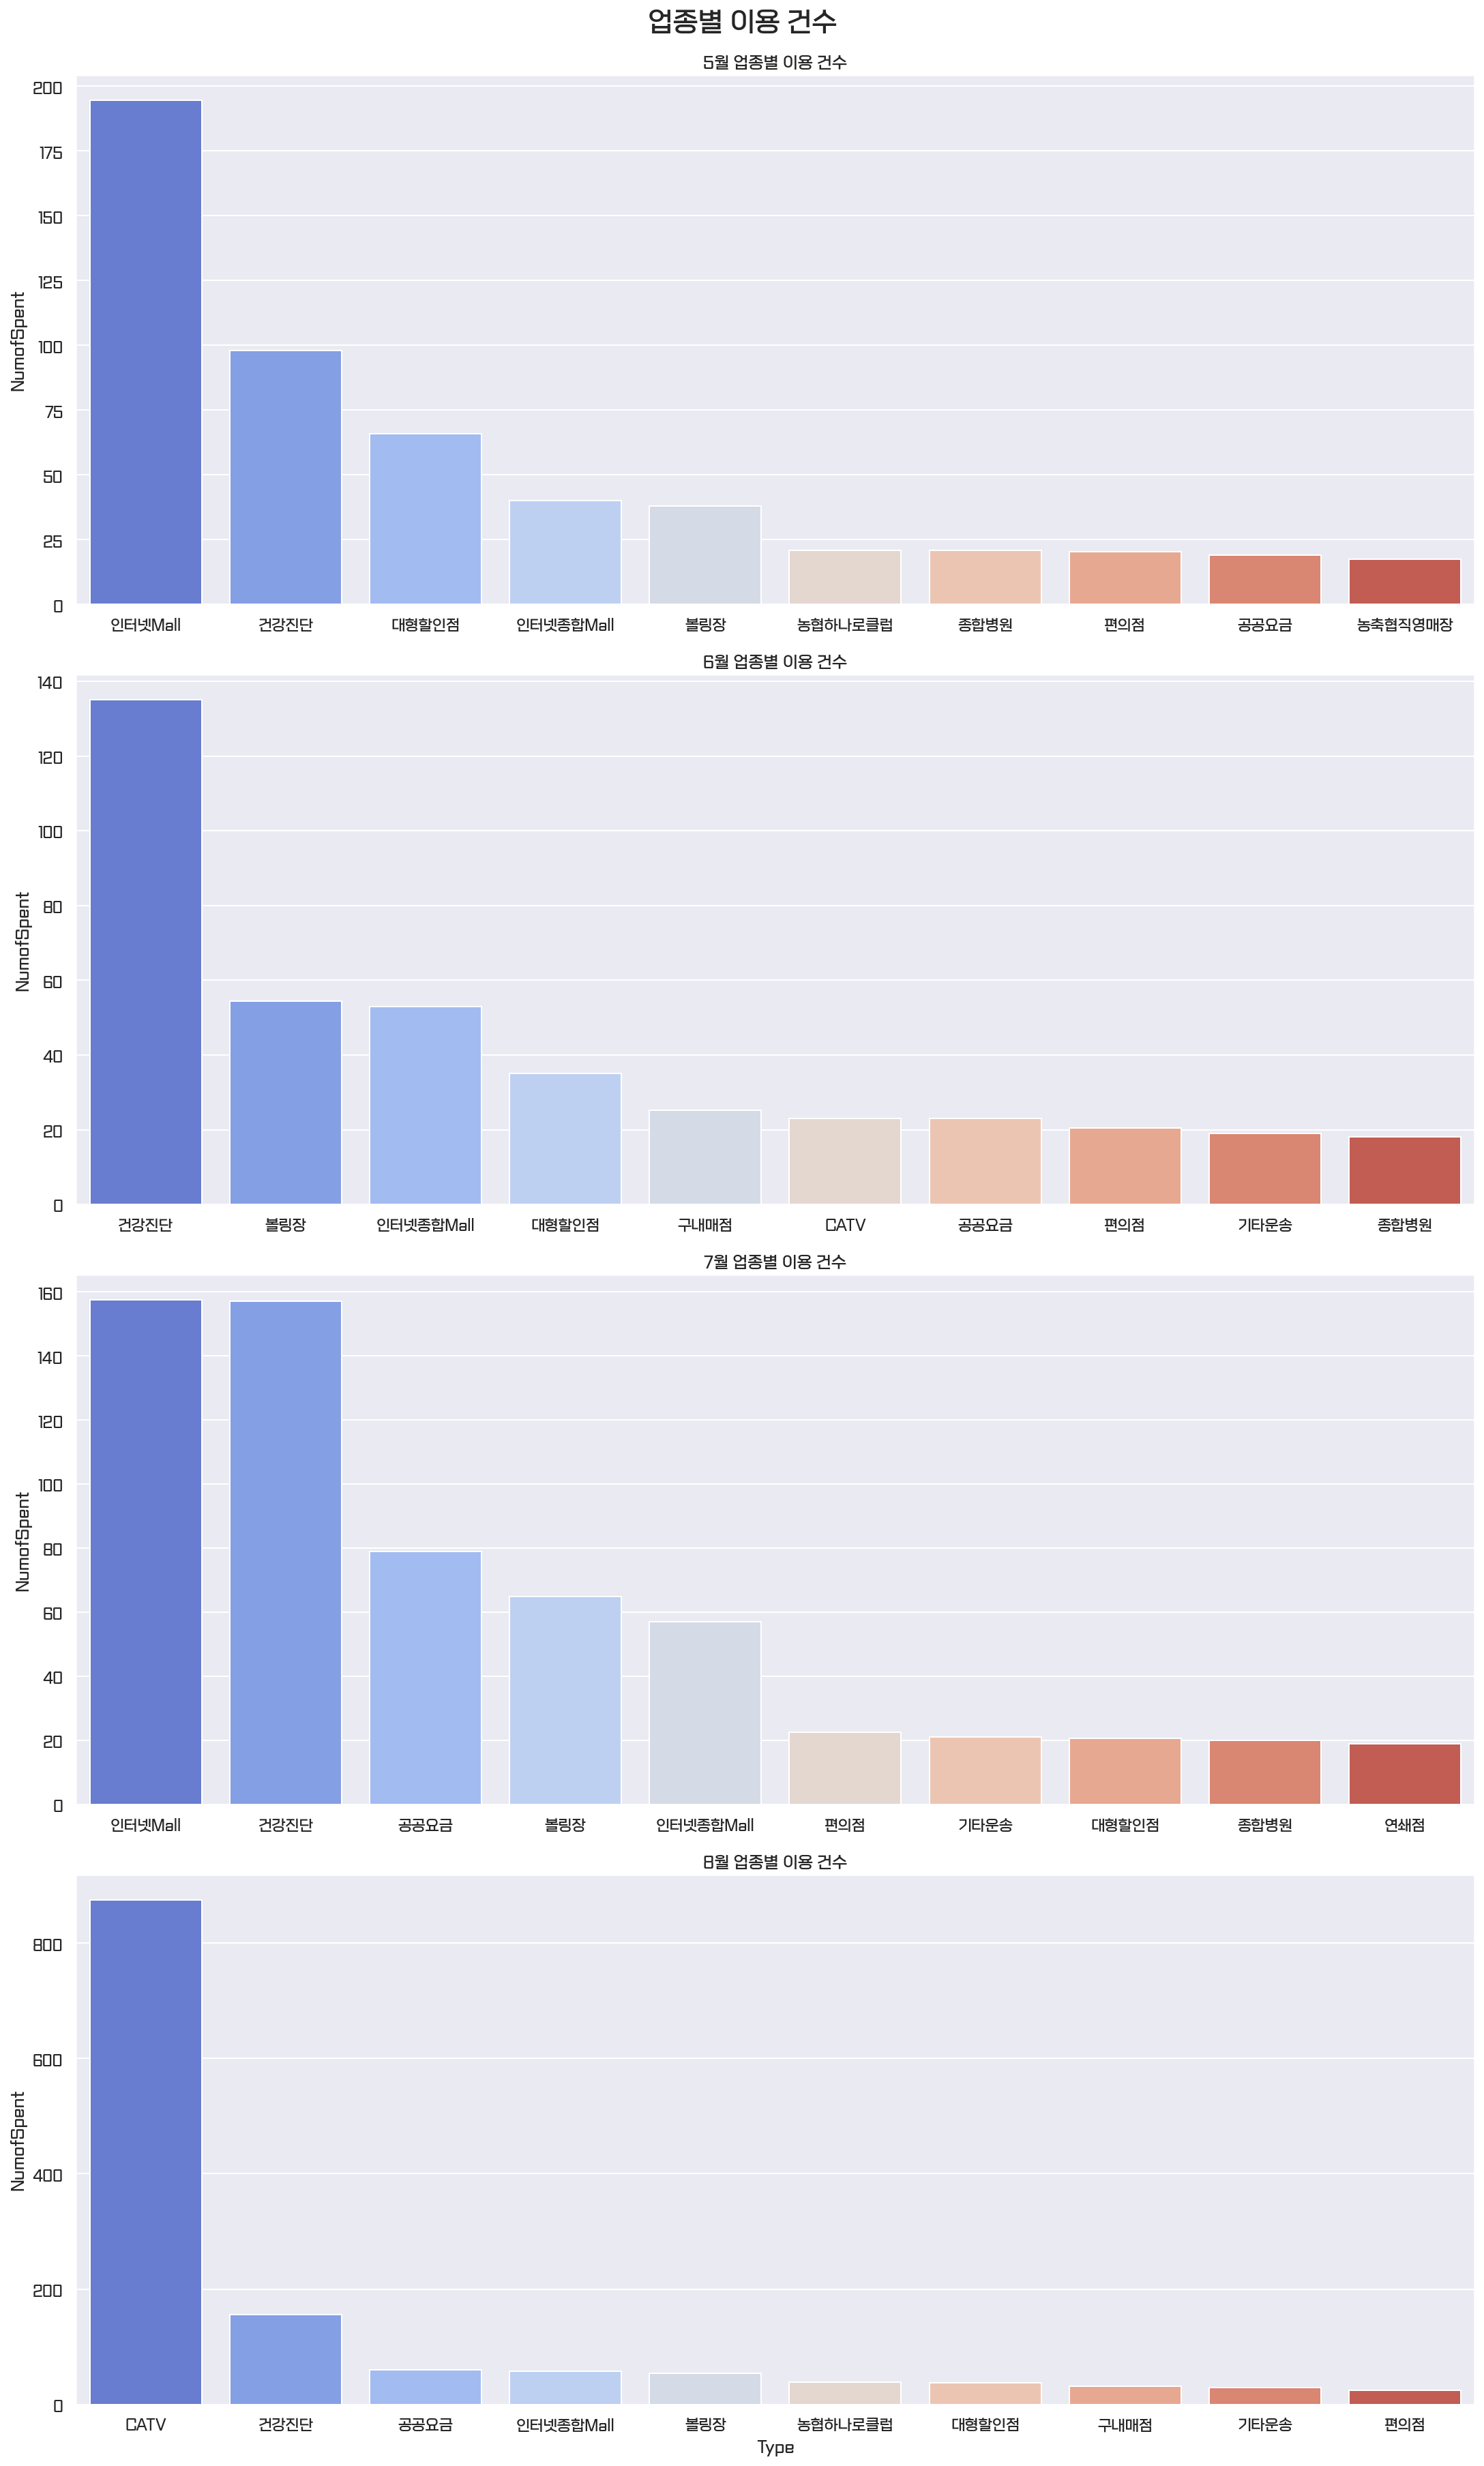

In [214]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, constrained_layout=True)
figure.set_size_inches(15, 25)
sns.barplot(data=ym_type_5.nlargest(10, 'NumofSpent'), x='Type', y='NumofSpent', ax=ax1, palette='coolwarm')
sns.barplot(data=ym_type_6.nlargest(10, 'NumofSpent'), x='Type', y='NumofSpent', ax=ax2, palette='coolwarm')
sns.barplot(data=ym_type_7.nlargest(10, 'NumofSpent'), x='Type', y='NumofSpent', ax=ax3, palette='coolwarm')
sns.barplot(data=ym_type_8.nlargest(10, 'NumofSpent'), x='Type', y='NumofSpent', ax=ax4, palette='coolwarm')

figure.suptitle('업종별 이용 건수', fontsize=20)
ax1.set(title='5월 업종별 이용 건수', xlabel=None)
ax2.set(title='6월 업종별 이용 건수', xlabel=None)
ax3.set(title='7월 업종별 이용 건수', xlabel=None)
ax4.set(title='8월 업종별 이용 건수')

plt.show()

### 월별, 업종별 재난지원금 이용 건수

[Text(0.5, 1.0, '8월 업종별 재난지원금 이용 건수')]

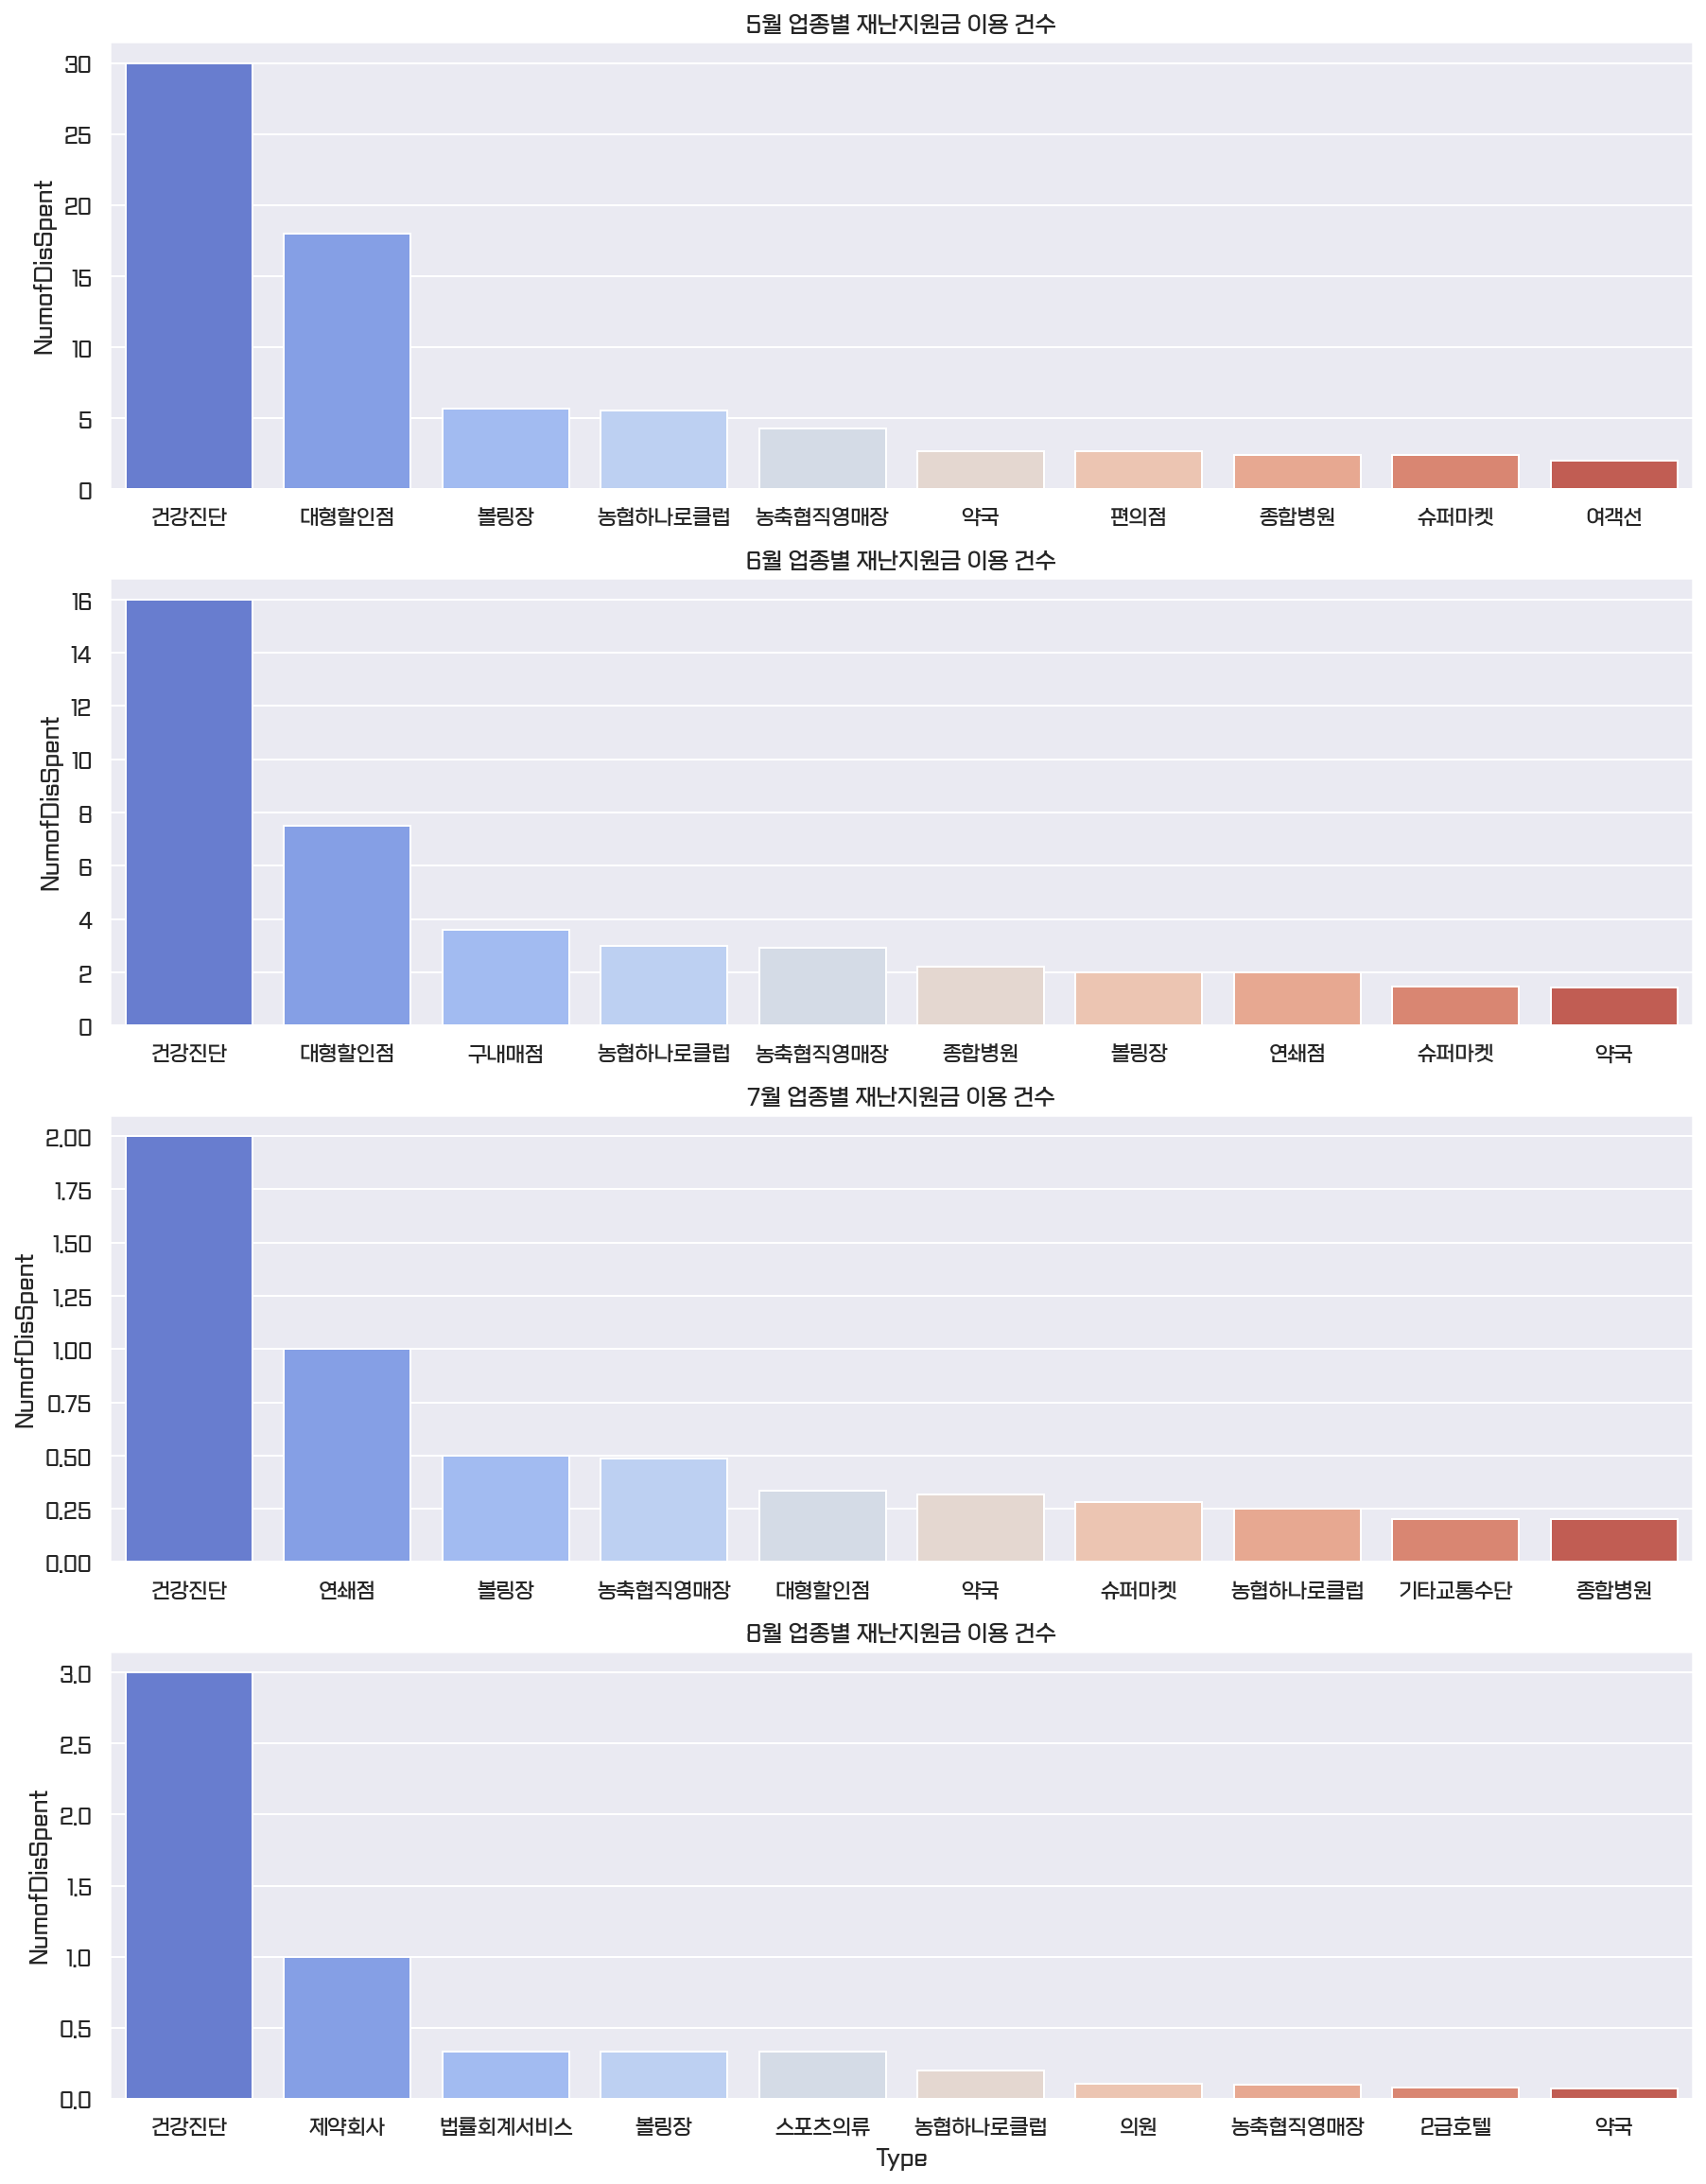

In [215]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
figure.set_size_inches(15, 20)
sns.barplot(data=ym_type_5.nlargest(10, 'NumofDisSpent'), x='Type', y='NumofDisSpent', ax=ax1, palette='coolwarm')
sns.barplot(data=ym_type_6.nlargest(10, 'NumofDisSpent'), x='Type', y='NumofDisSpent', ax=ax2, palette='coolwarm')
sns.barplot(data=ym_type_7.nlargest(10, 'NumofDisSpent'), x='Type', y='NumofDisSpent', ax=ax3, palette='coolwarm')
sns.barplot(data=ym_type_8.nlargest(10, 'NumofDisSpent'), x='Type', y='NumofDisSpent', ax=ax4, palette='coolwarm')

ax1.set(title='5월 업종별 재난지원금 이용 건수', xlabel=None)
ax2.set(title='6월 업종별 재난지원금 이용 건수', xlabel=None)
ax3.set(title='7월 업종별 재난지원금 이용 건수', xlabel=None)
ax4.set(title='8월 업종별 재난지원금 이용 건수')